This project has two parts. In the first part, you will run a regression, and identify and remove the 10% of points that have the largest residual errors. Then you’ll remove those outliers from the dataset and refit the regression, just like the strategy that Sebastian suggested in the lesson videos.

In the second part, you will get acquainted with some of the outliers in the Enron finance data, and learn if/how to remove them.

Sebastian described to us an algorithm for improving a regression, which you will implement in this project. You will work through it in the next few quizzes. To summarize, what you'll do is fit the regression on all training points discard the 10% of points that have the largest errors between the actual y values, and the regression-predicted y values refit on the remaining points.

Start by running the starter code (outliers/outlier_removal_regression.py) and visualizing the points. A few outliers should clearly pop out. Deploy a linear regression, where net worth is the target and the feature being used to predict it is a person’s age (remember to train on the training data!).

The “correct” slope for the main body of data points is 6.25 (we know this because we used this value to generate the data); **what slope does your regression have?**

Regression slope is: 5.07793064344


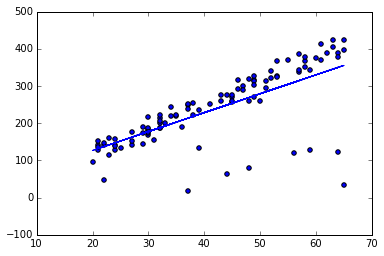

outlierCleaner() is returning an empty list, no refitting to be done


In [5]:
%matplotlib inline

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, 
                                                                            random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like


from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train,net_worths_train)

print "Regression slope is:", reg.coef_[0][0]





try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"


### What is the score you get when using your regression to make predictions with the test data?

In [6]:
reg.score(ages_test,net_worths_test)

0.87826247036646721




In outliers/outlier_cleaner.py, you will find the skeleton for a function called *outlierCleaner()* that you will fill in with a cleaning algorithm. It takes three arguments: *predictions* is a list of predicted targets that come from your regression, *ages* is the list of ages in the training set, and *net_worths* is the actual value of the net worths in the training set. There should be 90 elements in each of these lists (because the training set has 90 points in it). Your job is to return a list called cleaned_data that has only 81 elements in it, which are the 81 training points where the predictions and the actual values (net_worths) have the smallest errors (90 * 0.9 = 81). The format of cleaned_data should be a list of tuples, where each tuple has the form (age, net_worth, error). 

Once this cleaning function is working, you should see the regression result changes. **What is the new slope?** Is it closer to the “correct” result of 6.25?

In [7]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    for i in range(len(predictions)):
        error = net_worths[i] - predictions[i]
        tpl = (ages[i],net_worths[i],error)
        cleaned_data.append(tpl)
    
    return cleaned_data

Regression slope is: 5.07793064344


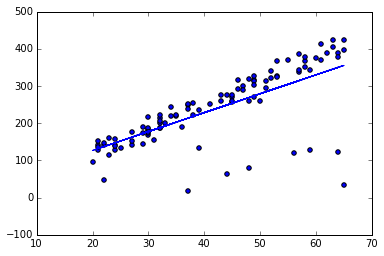

Error: 23.4374502678
Error: 29.5637995337
Error: 45.9332096937
Error: 28.6481986951
Error: -18.2744378581
Error: 32.2265868576
Error: 49.1992199258
Error: 16.864675064
Error: 4.24268037344
Error: 73.9552180422
Error: 49.6749099516
Error: -7.67556106354
Error: -20.1002285366
Error: 7.63909350339
Error: -0.606197227827
Error: 16.2873489147
Error: 50.5069165954
Error: -321.085238988
Error: 10.2546358138
Error: 44.3976190657
Error: 15.874365715
Error: 33.4386423887
Error: -0.0830817205343
Error: 30.7572273365
Error: -88.8356216513
Error: 29.8827764999
Error: 8.51185671955
Error: 66.3785936366
Error: 3.11622650013
Error: -10.3045632555
Error: -18.2763278167
Error: 34.6074428891
Error: 17.0962682383
Error: -196.585666674
Error: 10.4336033787
Error: -30.0147084411
Error: 19.4384492945
Error: 18.0308577282
Error: 5.40640001943
Error: -29.4856150986
Error: 38.9147627837
Error: 40.4126562793
Error: 36.1621848646
Error: 17.3783495134
Error: 11.1111956415
Error: 14.131413395
Error: 77.8704655147
E

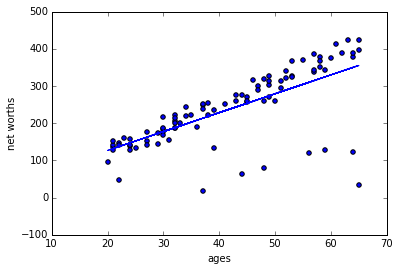

In [1]:
%matplotlib inline
import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, 
                                                                            random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like


from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train,net_worths_train)

print "Regression slope is:", reg.coef_[0][0]





try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"